Netflix Movies and TV shows Data Project.

About the dataset;

Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they had over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

This analysis will answer the following questions;

1. What is the ratio of movies to TV Shows
2. What are the most popular genre
3. What are the countries with the highest production
4. Who are the directors with the most productions
5. What duration of TV Shows are the highest
6. What are the years with the highest productions
7. What are the highest production ratings




Importing Required Libraries

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing CSV File

In [2]:
netflix_df = pd.read_csv('netflix_titles.csv')

In [81]:
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data Available,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Data Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Data Available,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Data Available,No Data Available,No Data Available,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Data Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,No Data Available,No Data Available,No Data Available,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Checking The Data Information

In [5]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [12]:
netflix_df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Checking Null Counts

In [8]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Checking For Duplicated Value Counts

In [9]:
netflix_df.duplicated().sum()

0

Handling Missing Values

In [64]:
# Drop rows with missing values
netflix_df.dropna()  
netflix_df['director'] = netflix_df['director'].fillna("No Data Available")
netflix_df['cast'] = netflix_df['cast'].fillna("No Data Available")
netflix_df['country'] = netflix_df['country'].fillna("No Data Available")
netflix_df['date_added']=netflix_df['date_added'].fillna(netflix_df['date_added'].mode()[0])          
netflix_df['rating']=netflix_df['rating'].fillna(netflix_df['rating'].mode()[0])      
netflix_df['duration']=netflix_df['duration'].fillna('No Data Available') 

In [65]:
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data Available,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Data Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Data Available,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Data Available,No Data Available,No Data Available,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Data Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,No Data Available,No Data Available,No Data Available,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Checking The Value Counts Of The 'Type' Column

In [13]:
netflix_df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

Separating The Movie List From The TV Show List In The 'Type' Column

In [14]:
movie_list = netflix_df[netflix_df['type']=='Movie']
series_list = netflix_df[netflix_df['type']=='TV Show']

In [15]:
movie_list.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [16]:
series_list.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


Creating A Pie-chart Showing The Ratio Of Movies To TV Shows

In [17]:
type_count = netflix_df['type'].value_counts()

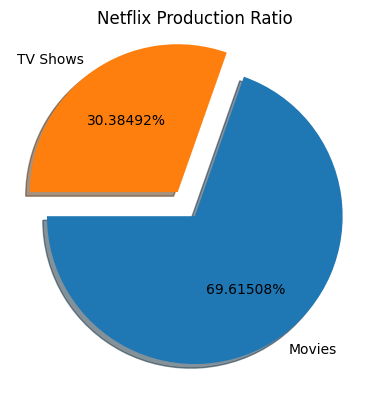

In [18]:
label = ['Movies', 'TV Shows']
explode= [0,0.2]
plt.pie(type_count.values, labels=label, autopct='%1.5f%%', shadow=True, explode=explode, startangle=180)
plt.title('Netflix Production Ratio')
plt.show()


OBSERVATION

The Pie-chart above shows that there are more movies(69.6%) to Tv shows(30.4%) been produced.

Count Of Directors

In [20]:
directors = pd.DataFrame(netflix_df.groupby('director')['show_id'].count().sort_values(ascending=False)[1:])
directors['count'] = directors['show_id']
directors.drop(['show_id'],axis=1,inplace=True)
directors=directors[:10]
directors.reset_index(inplace=True)

In [63]:
directors[0:10]

,director,count
0,"Raúl Campos, Jan Suter",18
1,Suhas Kadav,16
2,Marcus Raboy,16
3,Jay Karas,14
4,Cathy Garcia-Molina,13
5,Jay Chapman,12
6,Youssef Chahine,12
7,Martin Scorsese,12
8,Steven Spielberg,11
9,Don Michael Paul,10


Visualizing The Count of Directors

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Raúl Campos, Jan Suter'),
  Text(1, 0, 'Suhas Kadav'),
  Text(2, 0, 'Marcus Raboy'),
  Text(3, 0, 'Jay Karas'),
  Text(4, 0, 'Cathy Garcia-Molina'),
  Text(5, 0, 'Jay Chapman'),
  Text(6, 0, 'Youssef Chahine'),
  Text(7, 0, 'Martin Scorsese'),
  Text(8, 0, 'Steven Spielberg'),
  Text(9, 0, 'Don Michael Paul')])

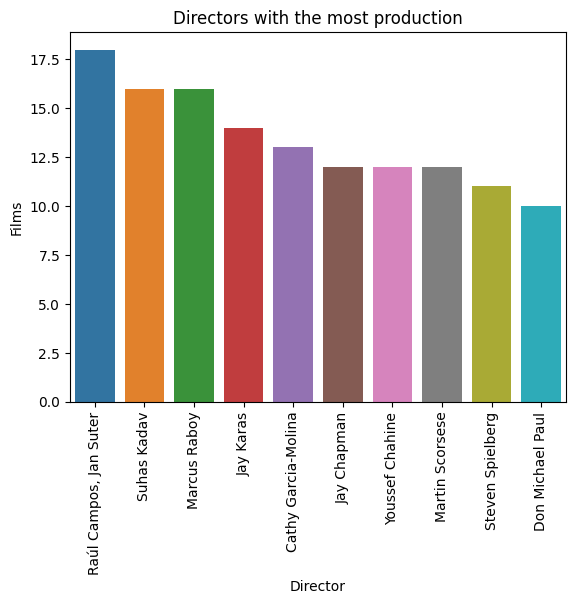

In [79]:
sns.barplot(x='director', y='count' , data=directors,)
plt.title('Directors with the most production')
plt.xlabel('Director')
plt.ylabel('Films')
plt.xticks(rotation='vertical')

OBSERVATION

The Bar-chart above shows the top 10 directors with the most production.
Ranking Raul Campos & Jan Suter as number one with 18 film produced

Count of the Available Genre

In [32]:
genres = pd.DataFrame(netflix_df.groupby('listed_in')['show_id'].count().sort_values(ascending=False)[1:]) 
genres['count'] = genres['show_id']
genres.drop(['show_id'], axis=1, inplace=True)
genres = genres[:10]
genres.reset_index(inplace=True)

In [62]:
genres[0:10]

,listed_in,count
0,Documentaries,359
1,Stand-Up Comedy,334
2,"Comedies, Dramas, International Movies",274
3,"Dramas, Independent Movies, International Movies",252
4,Kids' TV,220
5,Children & Family Movies,215
6,"Children & Family Movies, Comedies",201
7,"Documentaries, International Movies",186
8,"Dramas, International Movies, Romantic Movies",180
9,"Comedies, International Movies",176


Visualizing the list of Genre

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Documentaries'),
  Text(1, 0, 'Stand-Up Comedy'),
  Text(2, 0, 'Comedies, Dramas, International Movies'),
  Text(3, 0, 'Dramas, Independent Movies, International Movies'),
  Text(4, 0, "Kids' TV"),
  Text(5, 0, 'Children & Family Movies'),
  Text(6, 0, 'Children & Family Movies, Comedies'),
  Text(7, 0, 'Documentaries, International Movies'),
  Text(8, 0, 'Dramas, International Movies, Romantic Movies'),
  Text(9, 0, 'Comedies, International Movies')])

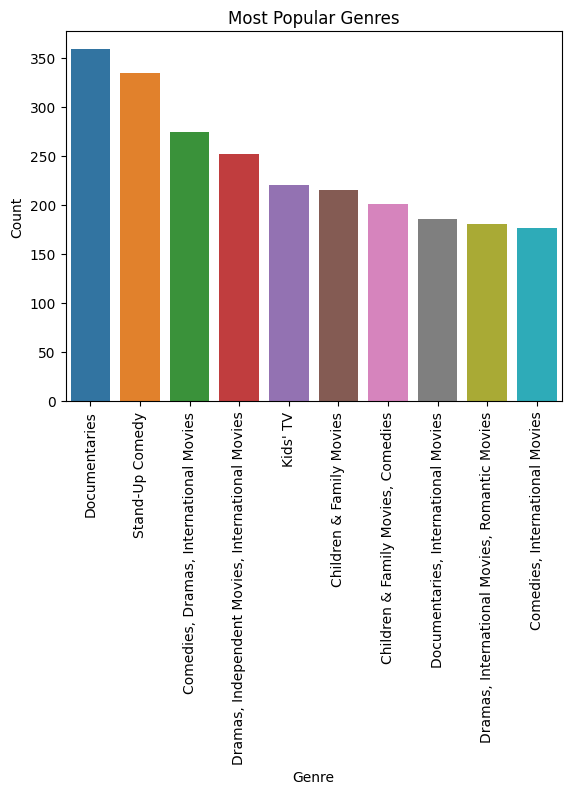

In [80]:
sns.barplot(x='listed_in', y='count', data=genres)
plt.title('Most Popular Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation='vertical')

OBSERVATION

According to the Bar-chart above, Documentaries is ranked the highest 

Checking and Visualizing the TV Shows with the highest duration 

In [87]:
seasons = netflix_df[netflix_df['type']=='TV Show'][['type', 'duration']]
seasons = seasons.groupby('duration').size().sort_values(ascending=False).reset_index()
seasons = seasons.rename(columns = {0: 'duration_count'}) [:5]
seasons

,duration,duration_count
0,1 Season,1793
1,2 Seasons,425
2,3 Seasons,199
3,4 Seasons,95
4,5 Seasons,65


Text(0, 0.5, 'Count')

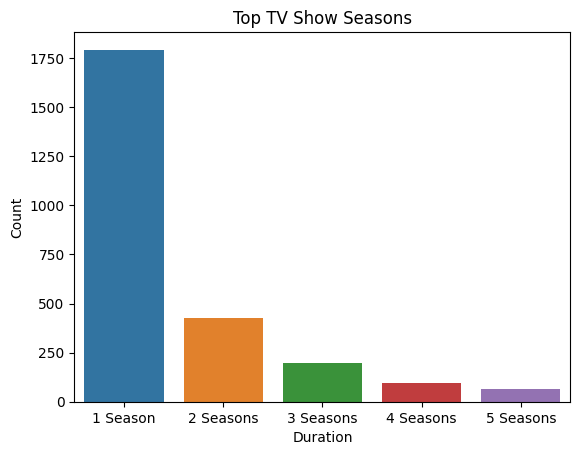

In [86]:
sns.barplot(x='duration', y='duration_count',data=seasons)
plt.title('Top TV Show Seasons')
plt.xlabel('Duration')
plt.ylabel('Count')


OBSERVATION

The Bar-chart above shows that most of the TV Shows have only one season

Analyzing Production Ratings

In [76]:
ratings = netflix_df['rating'].value_counts()
ratings

TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

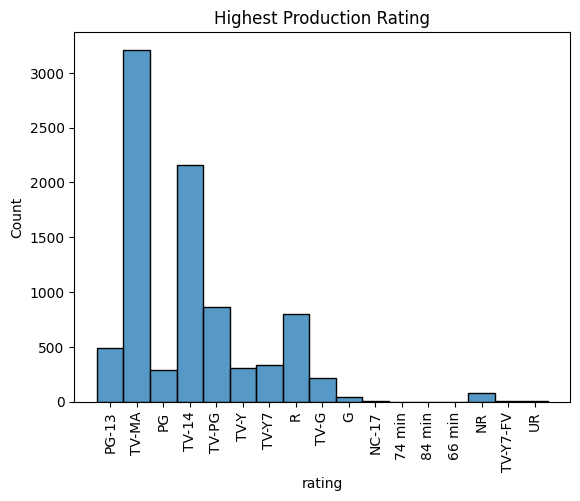

In [77]:
sns.histplot(netflix_df['rating'])
plt.title('Highest Production Rating')
plt.xticks(rotation='vertical')

OBSERVATION

The chart above shows the distribution of the films ratings. It ranks TV-MA(Mature Audience Only) programs as the highest programs produced.

Analyzing the Countries with the most production

In [51]:
region = netflix_df[netflix_df['country']!='NaN'][['type', 'country']]
region = pd.DataFrame(region.groupby('country').size().sort_values(ascending=False).reset_index())
region.rename(columns= {0:'sum'}, inplace=True)
region = region[:10]

In [60]:
region[0:10]

,country,sum
0,United States,2818
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199
5,Canada,181
6,Spain,145
7,France,124
8,Mexico,110
9,Egypt,106


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Japan'),
  Text(4, 0, 'South Korea'),
  Text(5, 0, 'Canada'),
  Text(6, 0, 'Spain'),
  Text(7, 0, 'France'),
  Text(8, 0, 'Mexico'),
  Text(9, 0, 'Egypt')])

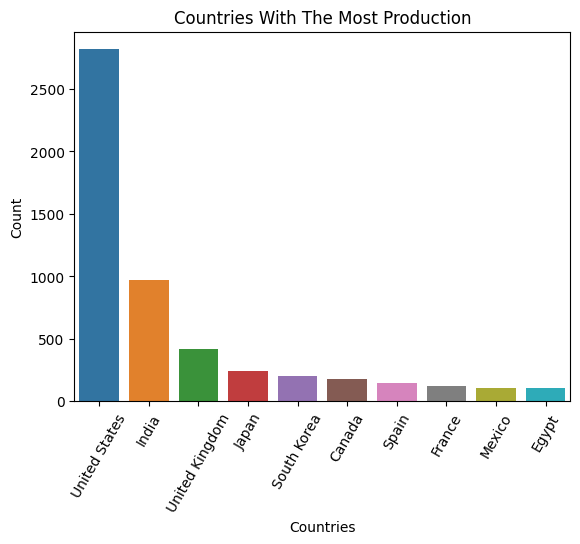

In [52]:
sns.barplot(x='country', y='sum', data=region)
plt.title('Countries With The Most Production')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=60)

OBSERVATION

USA ranks number one for the country with the highest film productions

Trends in the release of TV shows and movies over the years

In [53]:
year = netflix_df[['release_year']]
year = pd.DataFrame(year.groupby('release_year').size().sort_values(ascending=False).reset_index())
year = year[:10]
year.rename(columns = {0:'sum'}, inplace=True)

In [57]:
year.head()

,release_year,sum
0,2018,1147
1,2017,1032
2,2019,1030
3,2020,953
4,2016,902


Text(-3.6805555555555554, 0.5, 'Count')

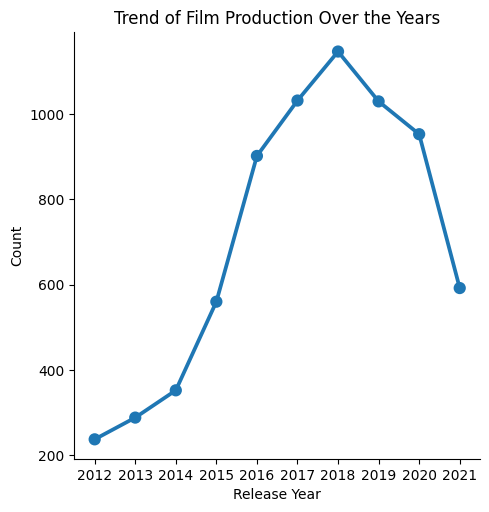

In [88]:
sns.catplot(x='release_year', y='sum', data=year, kind='point')
plt.title('Trend of Film Production Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Count')

OBSERVATION

This shows that 2018 was the year with the most films production

Summary of EDA Project on Netflix Dataset:

The goal of this exploratory data analysis (EDA) project was to gain insights and understanding from the Netflix dataset. The project involved data preparation and cleaning, exploratory analysis and visualization, asking and answering questions about the data, and summarizing the inferences.